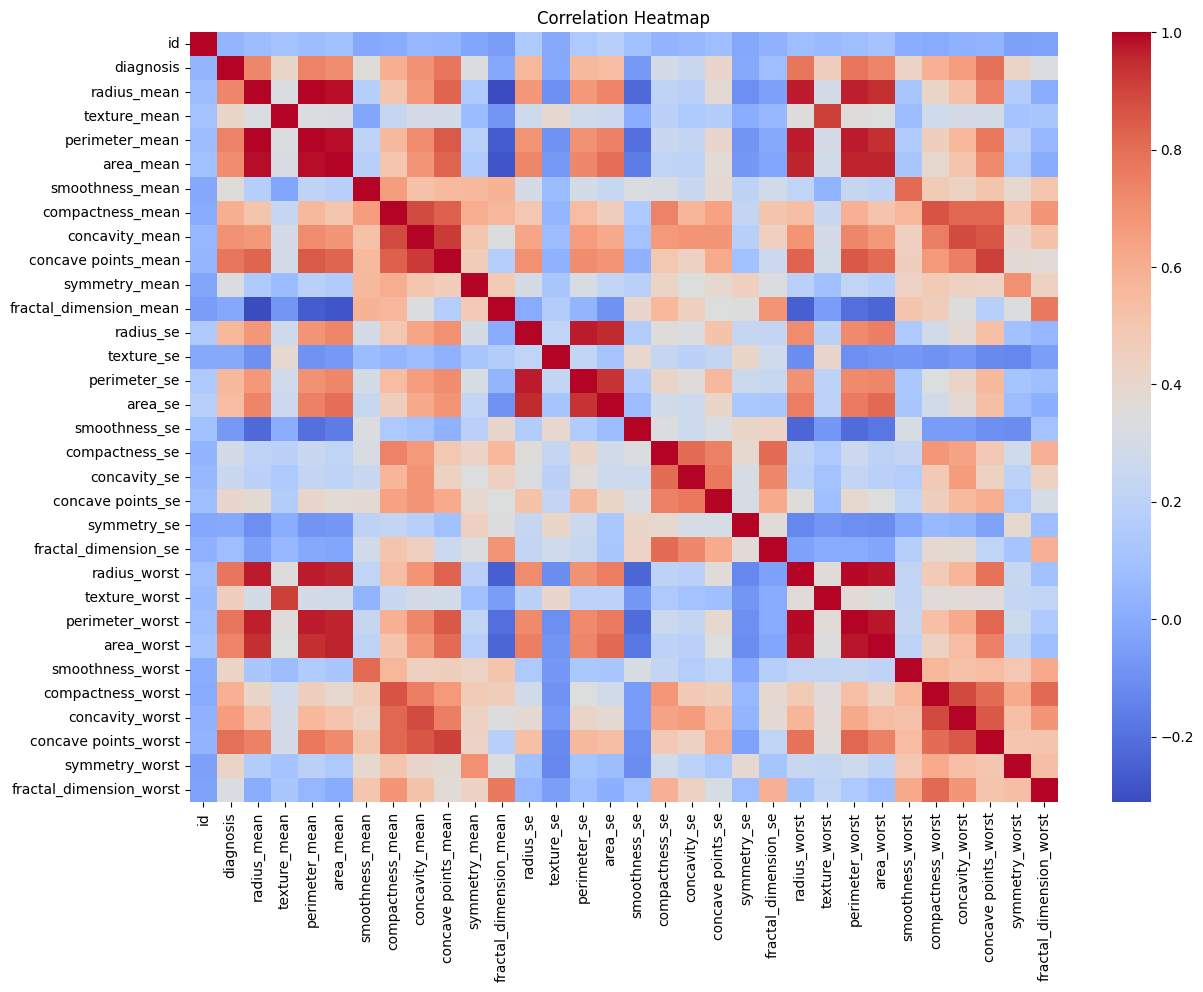


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Support Vector Machine Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       

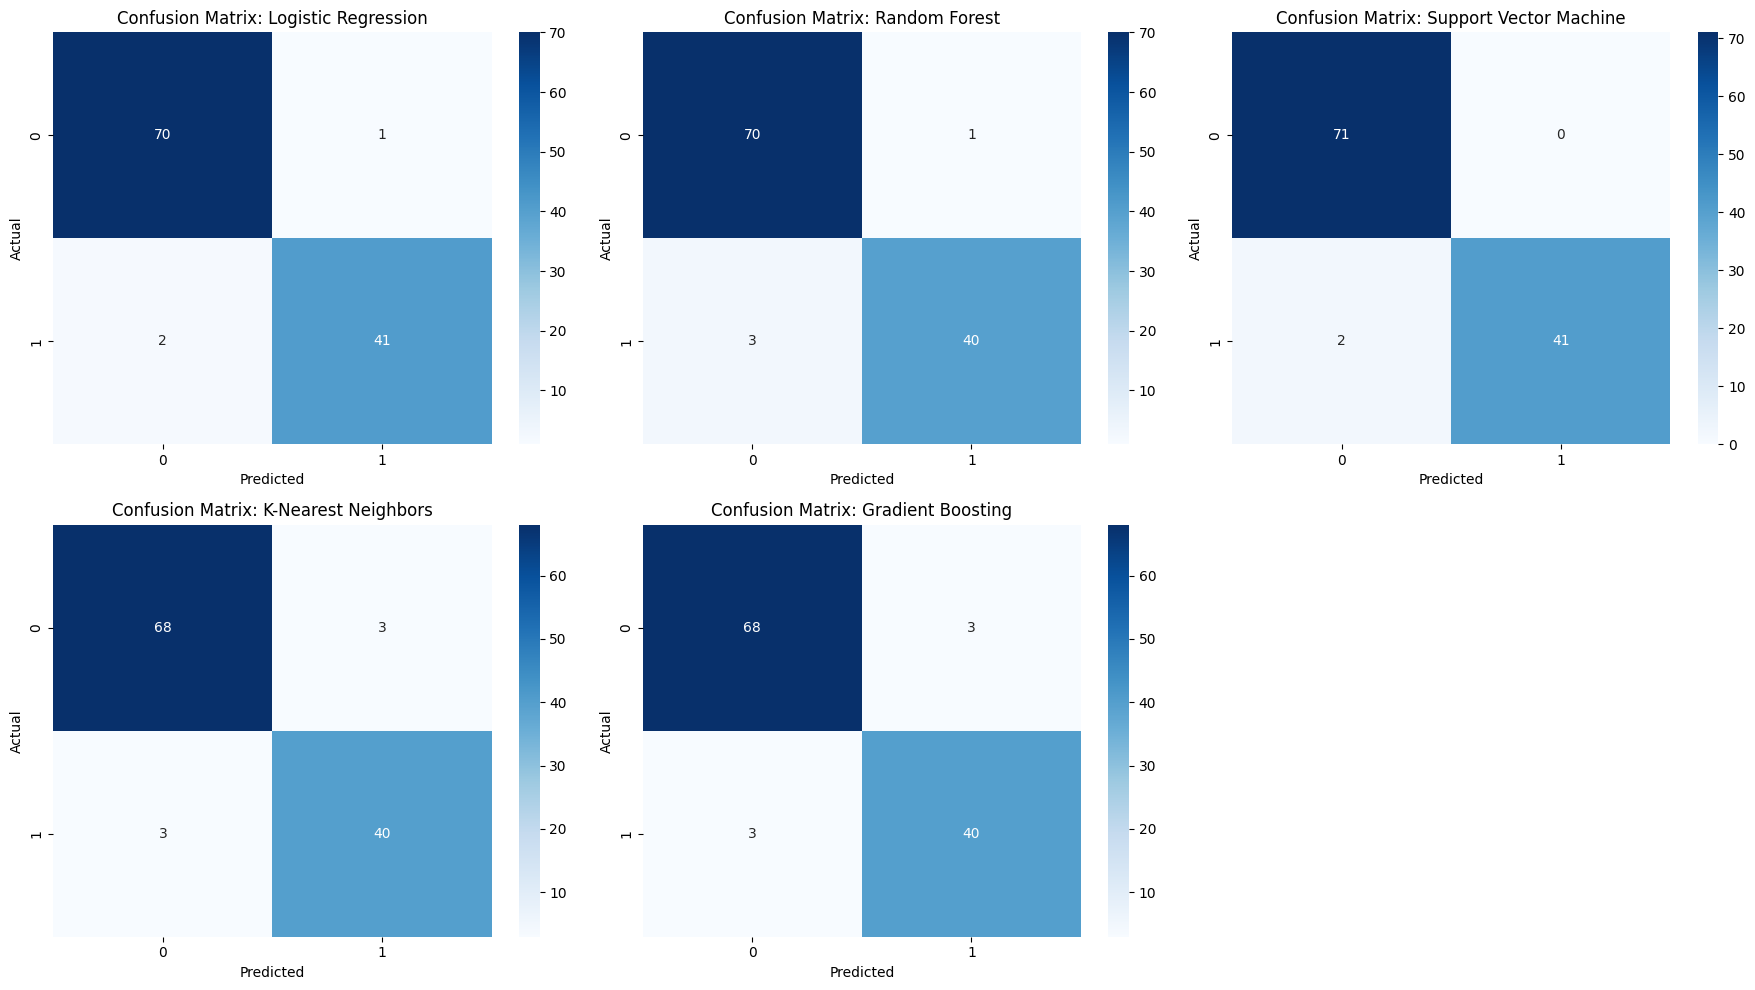

C:\Users\amits\AppData\Local\Temp\ipykernel_20416\2994422265.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


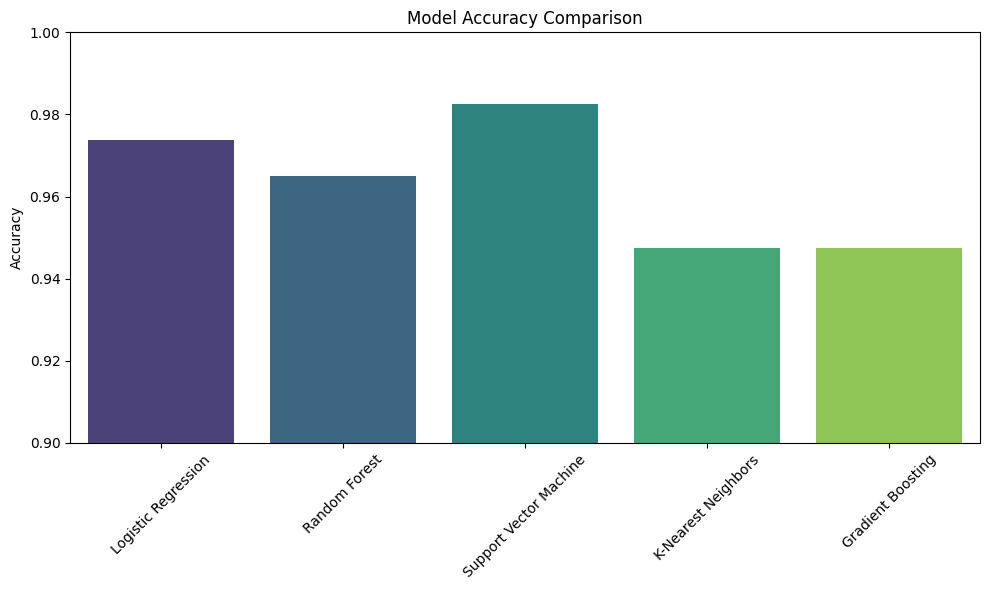

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
data = pd.read_csv("breast_cancer_data.csv")

# Drop unnamed columns if any
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Encode diagnosis column
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
y = data['diagnosis']
X = data.drop(['diagnosis'], axis=1)

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train, predict, evaluate
results = {}
conf_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Confusion Matrix: {name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Remove extra subplot if less than 6 models
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Bar graph comparing model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
